## Multiple Linear Regression

### **Step 01: Goal -**  
#### The goal is to build a regression model that predicts a mobile robot’s linear velocity using IMU measurements (acc_x, acc_y, ang_z).This helps evaluate whether IMU data alone can provide a reliable estimate of robot motion when other sensors are unavailable or unreliable.

### **Step 02: Data Analysis -**

In [398]:
import numpy as np 
import pandas as pd

1. Load Dataset

In [399]:
df = pd.read_csv('imu_robot_motion.csv')
df.head()

,lin_acc_x,lin_acc_y,ang_vel_z,robot_linear_velocity
0,0.10,0.01,0.01,0.43
1,0.13,0.06,0.02,0.44
2,0.13,0.03,0.03,0.37
3,0.14,NaN,0.02,0.48
4,0.17,0.04,0.01,0.49


In [400]:
df.describe()

,lin_acc_x,lin_acc_y,ang_vel_z,robot_linear_velocity
count,96.000000,89.000000,90.000000,96.000000
mean,1.047083,0.508202,0.166556,1.361458
std,0.561031,0.278513,0.093041,0.557472
min,0.100000,0.010000,0.010000,0.370000
25%,0.570000,0.290000,0.090000,0.882500
50%,1.045000,0.510000,0.155000,1.365000
75%,1.515000,0.750000,0.237500,1.837500
max,2.010000,0.990000,0.340000,2.310000


2. Dataset Visualization

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

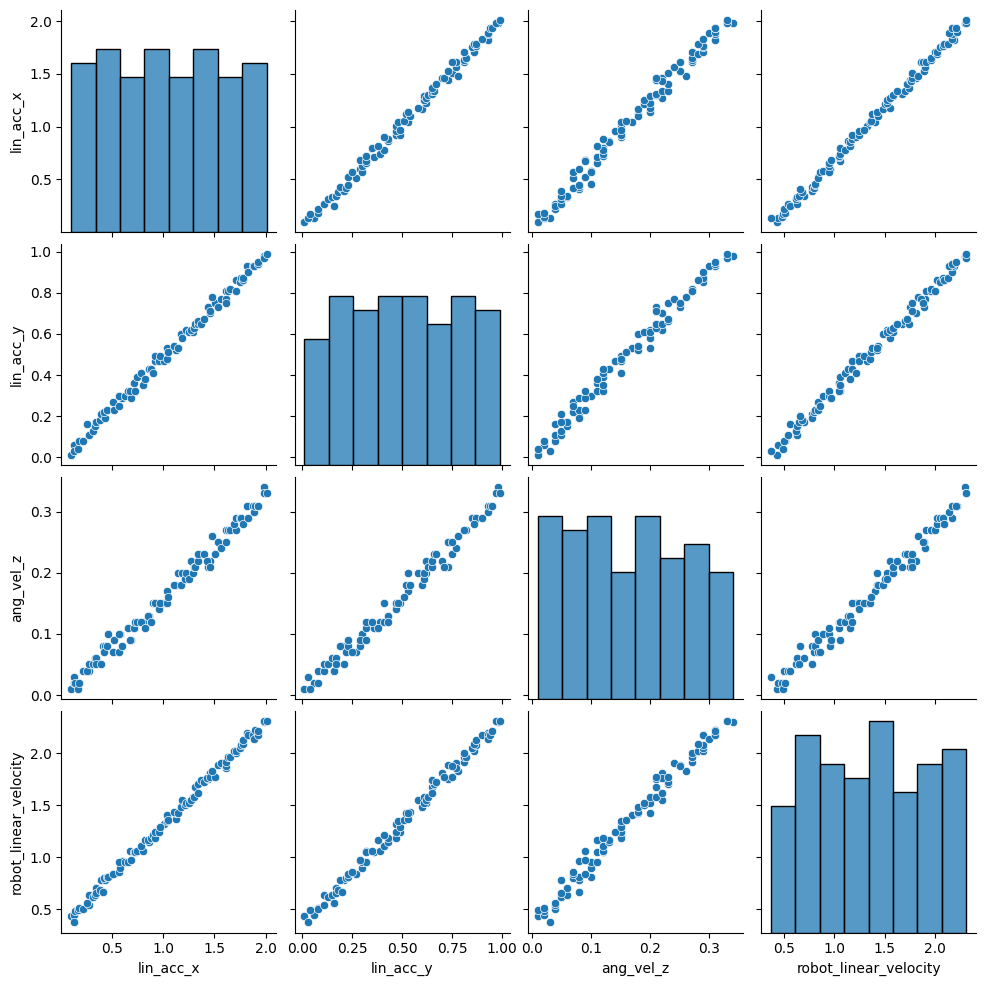

In [402]:
sns.pairplot(df)

3. Handling Missing Values

3. 1. Check Missing Values

In [403]:
df.isna().sum()

lin_acc_x                0
lin_acc_y                7
ang_vel_z                6
robot_linear_velocity    0
dtype: int64

3. 2. Fill Missing Values

3. 2. 1. Check Distribution

<Axes: xlabel='lin_acc_y', ylabel='Count'>

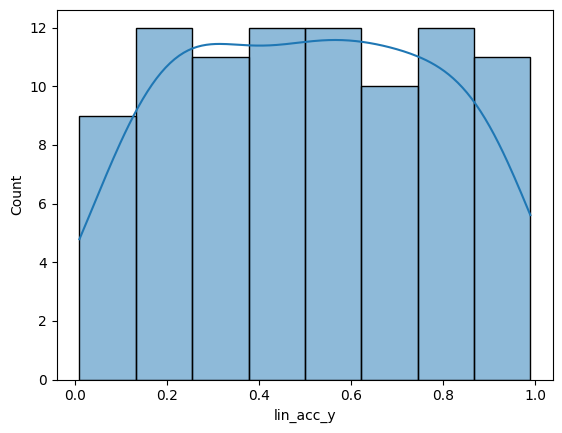

In [404]:
sns.histplot(x=df.iloc[:,1], kde=True)

<Axes: xlabel='ang_vel_z', ylabel='Count'>

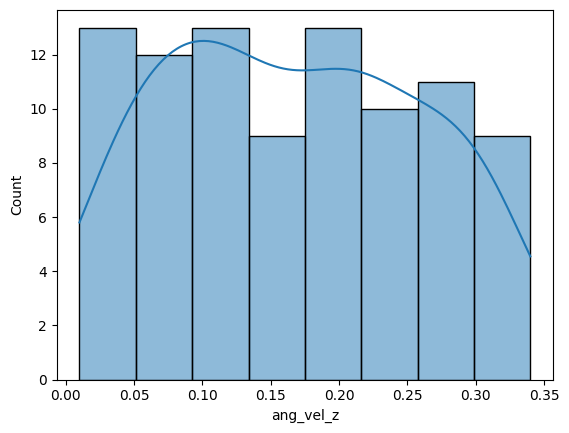

In [405]:
sns.histplot(x=df.iloc[:,2], kde=True)

In [406]:
#Decision: Since all features seems to be normally distributed, we will fill missing values with mean of respective columns.

3. 2. 2. Fill with Mean Value

In [407]:
# round() : to limit decimal places to 2, for example 0.123456 -> 0.12

df['lin_acc_y'] = df['lin_acc_y'].fillna(round(df['lin_acc_y'].mean(),2)) 
df['ang_vel_z'] = df['ang_vel_z'].fillna(round(df['ang_vel_z'].mean(),2))

3. 2. 3. Confirm No Missing Values

In [408]:
df.head()

,lin_acc_x,lin_acc_y,ang_vel_z,robot_linear_velocity
0,0.10,0.01,0.01,0.43
1,0.13,0.06,0.02,0.44
2,0.13,0.03,0.03,0.37
3,0.14,0.51,0.02,0.48
4,0.17,0.04,0.01,0.49


In [409]:
df.isna().sum()

lin_acc_x                0
lin_acc_y                0
ang_vel_z                0
robot_linear_velocity    0
dtype: int64

### **Step 03: Feature Engineering -**

1. Feature Selection

In [410]:
X = df[['lin_acc_x', 'lin_acc_y', 'ang_vel_z']]
y = df['robot_linear_velocity']

2. Train Test Split

In [411]:
from sklearn.model_selection import train_test_split

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Scalling: Standardization

In [413]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Step 04: Model Training -**

In [414]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [415]:
model.coef_,model.intercept_

(array([0.51013263, 0.01350314, 0.02126432]), np.float64(1.3703947368421057))

### **Step 05: Model Evaluation -**

1. Prediction on Test Set

In [433]:
y_pred = model.predict(X_test)

2. Error

In [434]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.0017944434996973323
Root Mean Squared Error: 0.04236087227262125


3. Performance Metrics

3. 1. R Square

In [435]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.9948328439338793


3. 2. Adjusted R Square

In [436]:
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Adjusted R^2 Score: {adj_r2}')

Adjusted R^2 Score: 0.9938640021714816


4. Performance Visualization

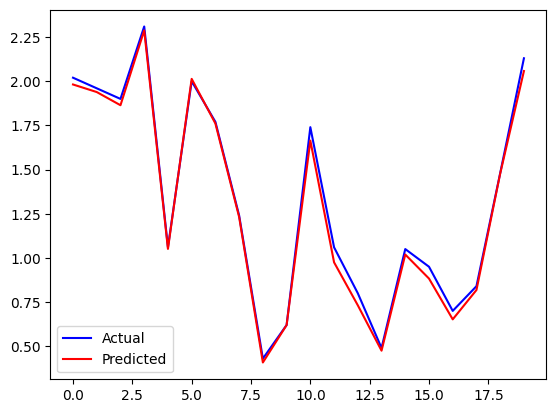

In [437]:
plt.plot(y_test.values, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r')
plt.legend()
plt.show()

### **Step 06: Deployment -** Will Learn Later